## ใครแกร่งกว่าตลาด?

In [27]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format='retina'

import starfishX as sx

In [2]:
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [35]:
def getHistPrice(symbol):
    df = tv.get_hist(symbol=symbol,exchange='set',interval=Interval.in_daily,n_bars=200)
    df['Date'] = pd.to_datetime(df.index)
    df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
    df['Date'] = pd.to_datetime(df['Date'])

    df = df[['Date','close']]
    df = df.set_index('Date')
    df.columns = ['set']
    return df

In [36]:
basket = ['set','kce','advanc','gulf','scb','kbank','ea','or']

p = 0
for i in basket:
 if(p==0):
    df = getHistPrice(i)
    p=1
 else:
    k = getHistPrice(i)
    df[i] = k

<AxesSubplot:xlabel='Date'>

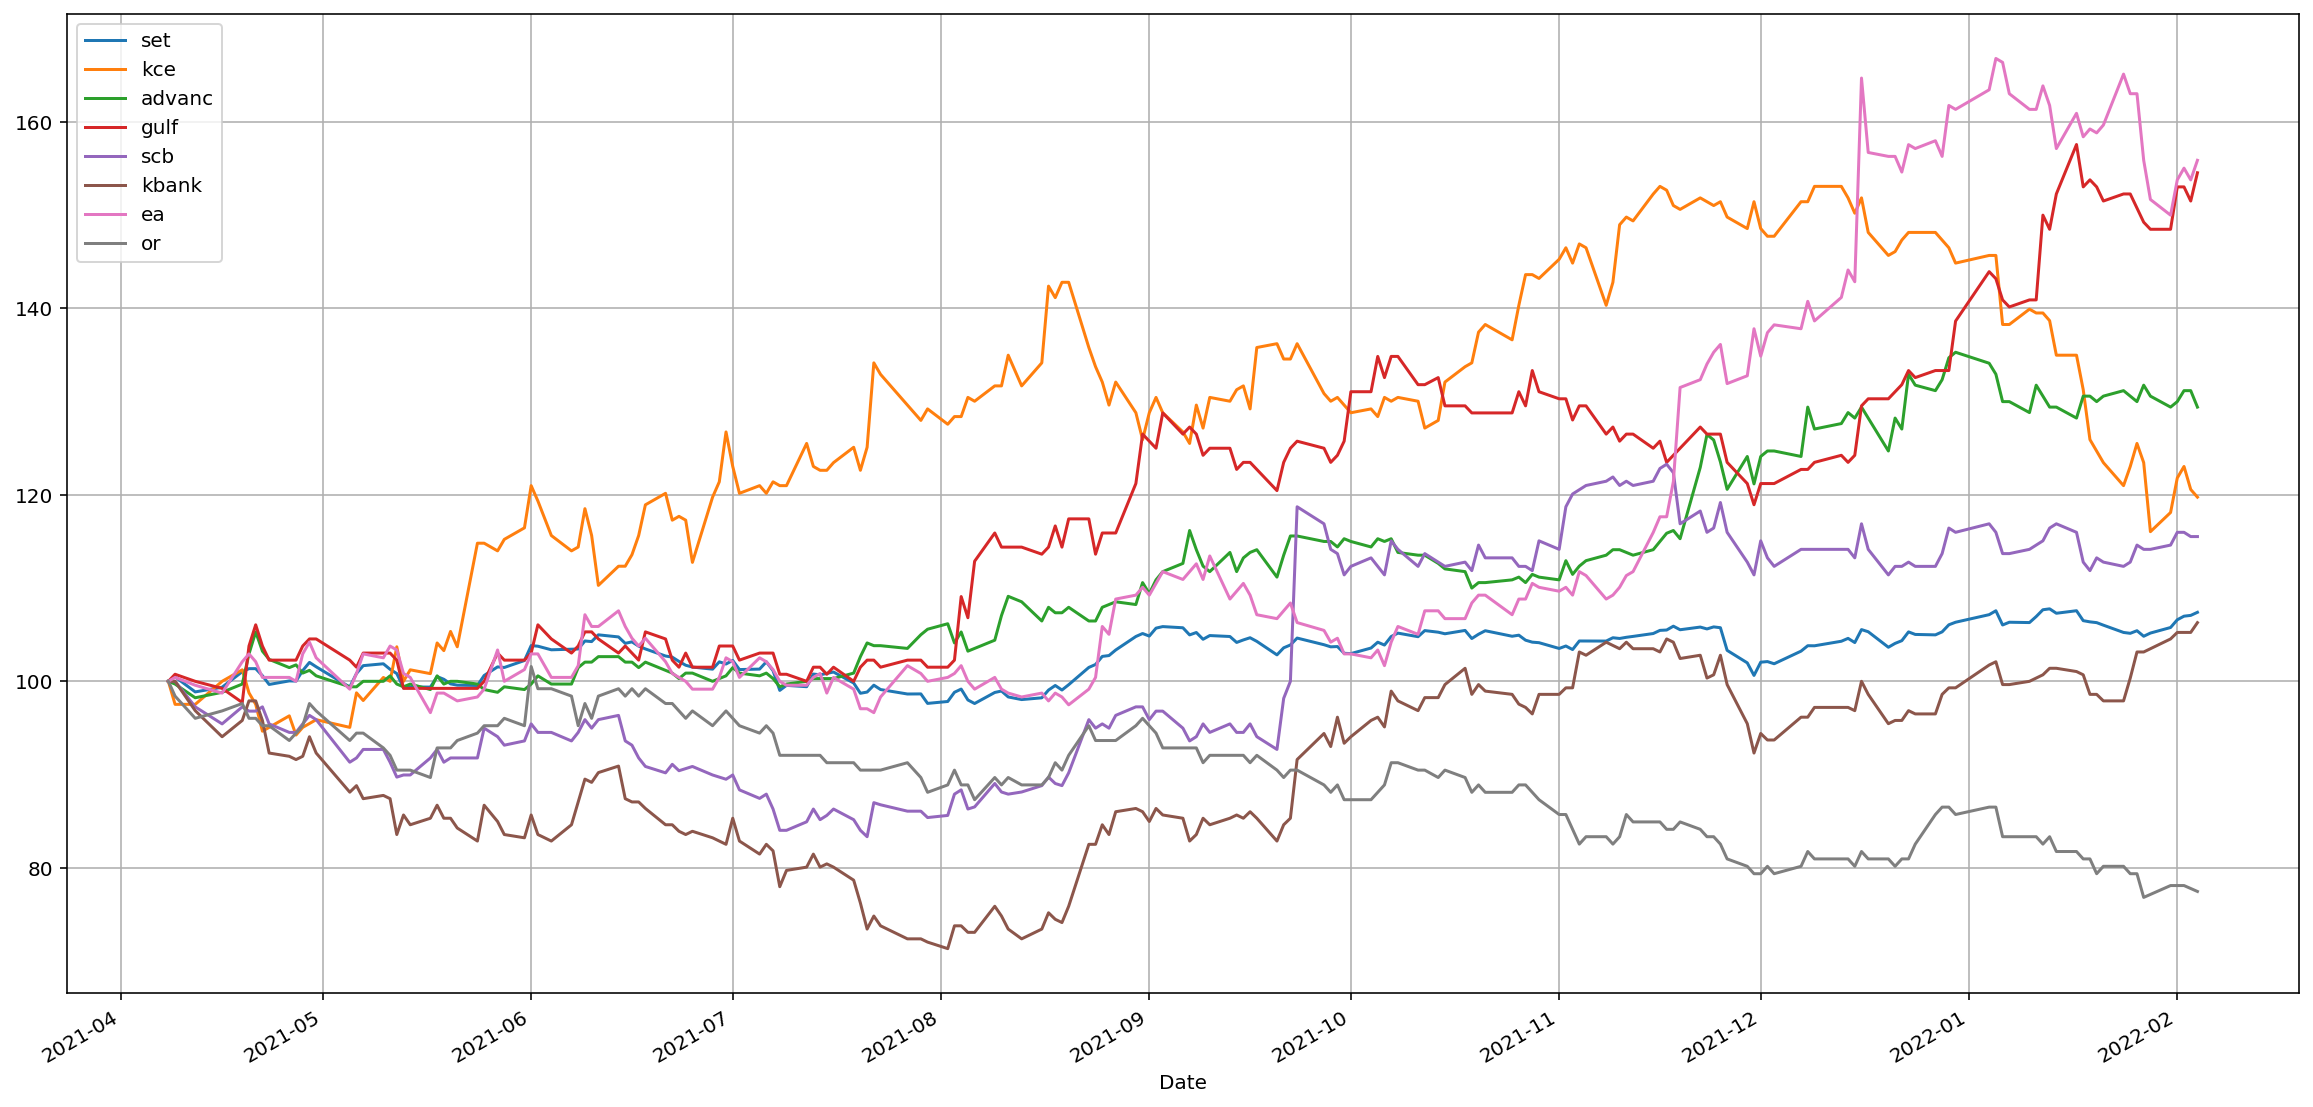

In [37]:
df.rebase(100).plot(figsize=(20,10),grid=True)